In [15]:
import fiona
import geopandas as gpd
import utm
from shapely.geometry import Point

In [2]:
uri = 's3://naip-analytic/az/2017/60cm/index/naip_3_17_3_1_az.shp'

In [31]:
naip13 = gpd.read_file('/home/ubuntu/naip/2013/naip_3_13_3_1_az.shp')
naip15 = gpd.read_file('/home/ubuntu/naip/2015/naip_3_15_1_1_az.shp')
naip17 = gpd.read_file('/home/ubuntu/naip/2017/naip_3_17_3_1_az.shp')

In [32]:
naip13.to_file('naip_2013.geojson', driver='GeoJSON')
naip13.to_file('naip_2015.geojson', driver='GeoJSON')
naip13.to_file('naip_2017.geojson', driver='GeoJSON')

/home/ubuntu/miniconda3/lib/python3.7/site-packages/geopandas/io/file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():


In [5]:
gdf17 = gpd.read_file('shp/az_naip_2017.geojson')

In [24]:
import pandas as pd
dmab = pd.read_csv('dm_afb.csv', index_col=[0])
dmab.reset_index(drop=True, inplace=True)
coords = eval(dmab.iloc[10, :].coords)
coords

(32.100833, -111.2625)

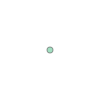

In [25]:
tst = Point(coords[-1], coords[0])
tst

In [53]:
%%time
utm.from_latlon(*coords)

CPU times: user 34 µs, sys: 1e+03 ns, total: 35 µs
Wall time: 38.9 µs


(475232.6071665715, 3551642.50964425, 12, 'S')

In [106]:
%%time
match = gdf17[gdf17.geometry.intersects(tst)]
midx = match.index[0]

CPU times: user 45.6 ms, sys: 4.49 ms, total: 50.1 ms
Wall time: 48.1 ms


In [107]:
fn = match.at[midx, 'FileName']
fn = fn.replace('.tif', '.mrf')

In [127]:
%%timeit pass
usgs_id = match.at[midx, 'USGSID']
quad = usgs_id[:-2]

4.86 µs ± 85.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [133]:
timeres = ['2017/60cm', '2015/100cm', '2013/100cm']
s3s = ['s3://naip-analytic/az/{}/rgbir/{}'.format(res, '/'.join([quad, fn])) for res in timeres]

In [130]:
import rasterio
import os
os.environ['AWS_REQUEST_PAYER'] = 'requester'
os.environ['AWS_DEFAULT_REGION'] = 'us-west-2'

In [ ]:
naip = 's3://naip-analytic/az/2017/60cm/rgbir/31111/m_3111139_ne_12_h_20170610.mrf'

In [62]:
for k, v in match.items():
    print(k, v.values[0])

AREA 0.004
PERIMETER 0.25
ST AZ
QQNAME THREE POINTS NE
QKEY 3203451111500
QUADRANT NE
APFONAME 3211162
GNIS 32111a3
DY 32
MY 03
SY 45
DX 111
MX 15
SX 00
OLAT 320345
OLONG 1111500
ArcKey 3203451111500
Band M4B
USGSID 3211162
Qdrnt NE
UTM 12
Res 1
SrcImgDate 20130608
VerDate 20130819
FileName m_3211162_ne_12_1_20130608_20130819.tif
geometry POLYGON ((-111.3124999995753 32.12499999975023, -111.2499999997001 32.12499999975023, -111.2499999997001 32.06249999987517, -111.3124999995753 32.06249999987517, -111.3124999995753 32.12499999975023))


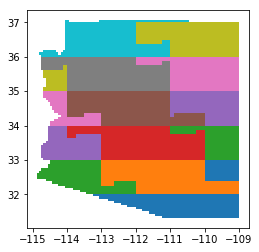

In [29]:
%matplotlib inline
gdf17.plot(column='USGSID')

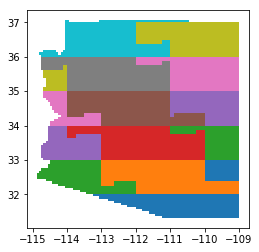

In [105]:
%matplotlib inline
gdf17.plot(column='APFONAME')

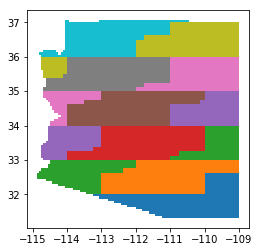

In [36]:
gdf17.plot(column='GNIS')

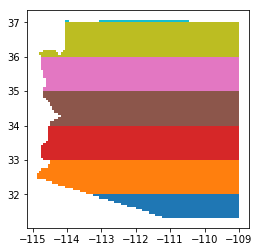

In [40]:
gdf17.plot(column='DY')

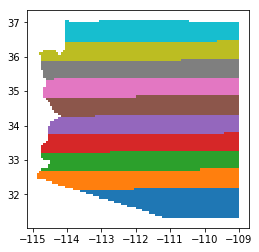

In [49]:
gdf17.plot(column='QKEY')

In [34]:
gdf17.columns

Index(['AREA', 'PERIMETER', 'ST', 'QQNAME', 'QKEY', 'QUADRANT', 'APFONAME',
       'GNIS', 'DY', 'MY', 'SY', 'DX', 'MX', 'SX', 'OLAT', 'OLONG', 'ArcKey',
       'Band', 'USGSID', 'Qdrnt', 'UTM', 'Res', 'SrcImgDate', 'VerDate',
       'FileName', 'geometry'],
      dtype='object')